In [13]:
# Capítulo 7 — Método do Lugar das Raízes (Root Locus)
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [14]:
# =============================
# 1️⃣ Sistema base
# =============================
# G(s) = 1 / (s^3 + 8s^2 + 15s)
G = ctrl.tf([1], [1, 8, 15, 0])
print("Função de Transferência G(s):")
print(G)


Função de Transferência G(s):
<TransferFunction>: sys[55]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          1
  ------------------
  s^3 + 8 s^2 + 15 s


/usr/local/lib/python3.12/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


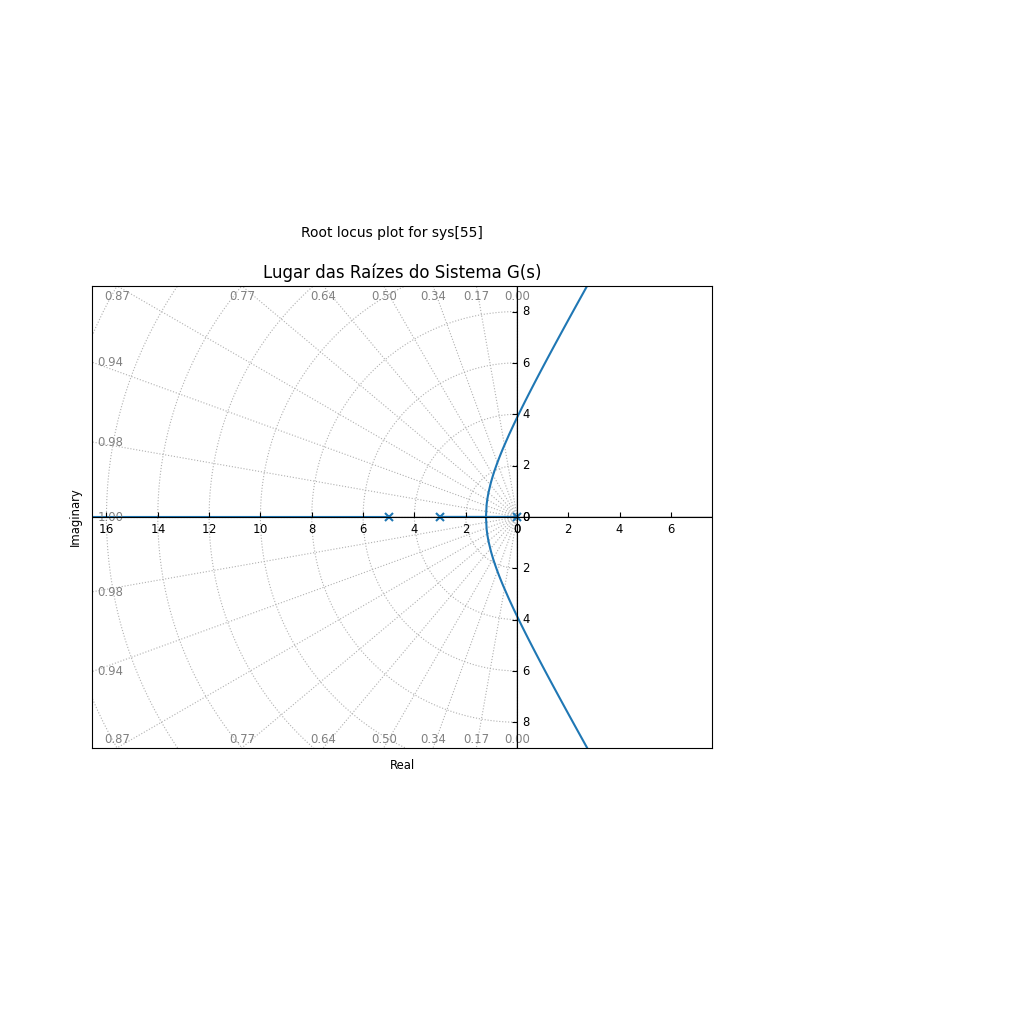

In [15]:
# =============================
# 2️⃣ Lugar das raízes
# =============================

plt.figure(figsize=(8,6))
ctrl.root_locus(G, plot=True)   # versão correta
plt.title("Lugar das Raízes do Sistema G(s)")
plt.grid(True)
plt.show()


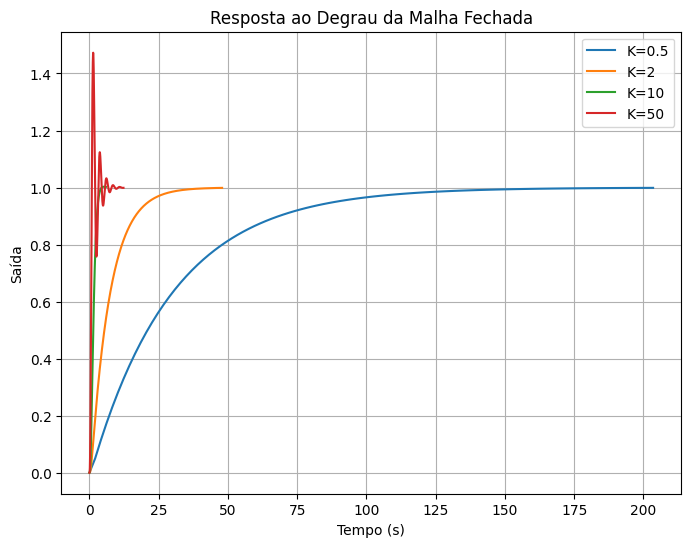

In [16]:
# =============================
# 3️⃣ Resposta ao degrau para diferentes K
# =============================

K_values = [0.5, 2, 10, 50]

plt.figure(figsize=(8,6))
for K in K_values:
    T = ctrl.feedback(K * G, 1)
    t, y = ctrl.step_response(T)
    plt.plot(t, y, label=f"K={K}")

plt.title("Resposta ao Degrau da Malha Fechada")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# =============================
# 4️⃣ Polos da malha fechada
# =============================

def get_poles(sys):
    if hasattr(sys, "poles"):
        return sys.poles()
    elif hasattr(sys, "pole"):
        return sys.pole()
    else:
        raise Exception("Método de polos não encontrado.")

for K in K_values:
    T = ctrl.feedback(K * G, 1)
    poles = get_poles(T)
    print(f"K={K} → Polos: {poles}")


K=0.5 → Polos: [-5.04835214+0.j -2.91770258+0.j -0.03394528+0.j]
K=2 → Polos: [-5.17740968+0.j -2.67836283+0.j -0.14422749+0.j]
K=10 → Polos: [-5.66307683+0.j         -1.16846159+0.63286812j -1.16846159-0.63286812j]
K=50 → Polos: [-6.87604311+0.j         -0.56197844+2.63738587j -0.56197844-2.63738587j]


/usr/local/lib/python3.12/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


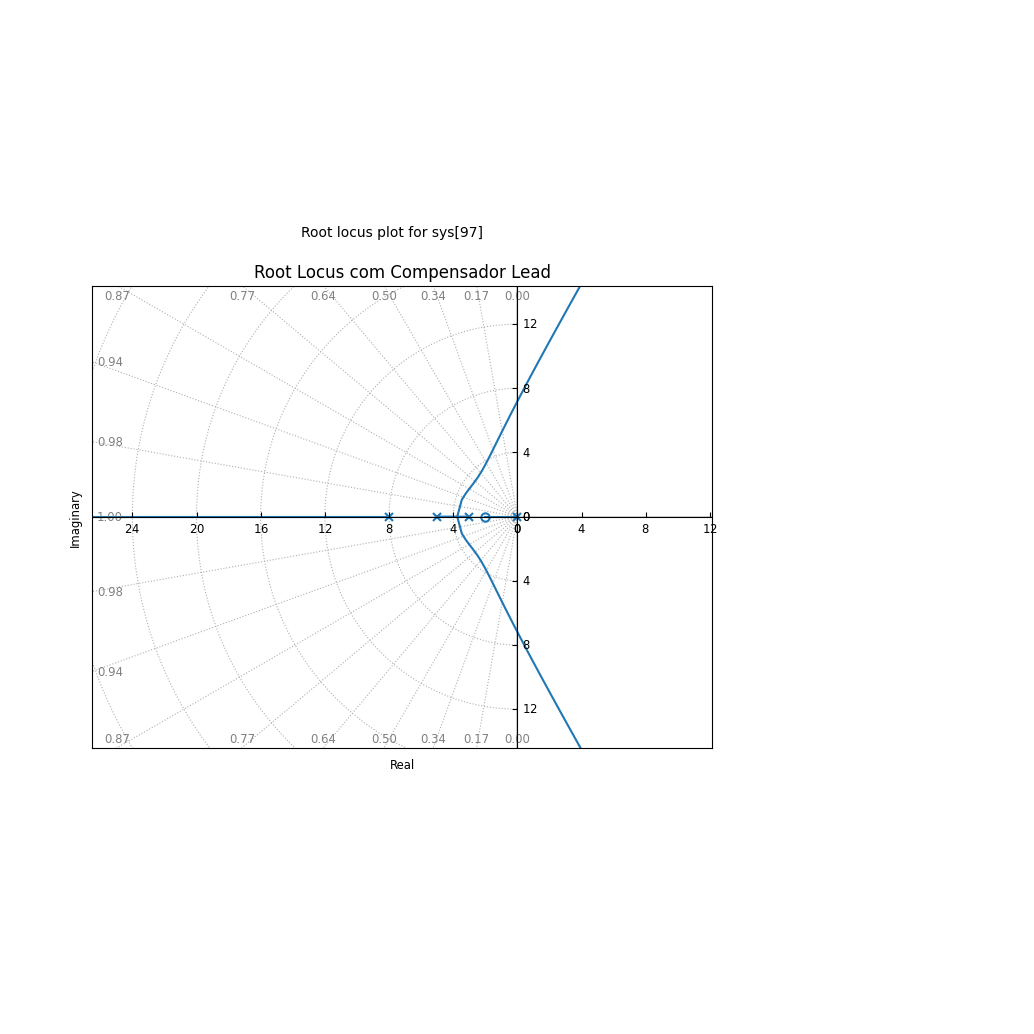

In [18]:
# =============================
# 5️⃣ Projeto de compensador Lead simples
# =============================

# Compensador lead: C(s) = (s + z) / (s + p)
z = 2
p = 8
C = ctrl.tf([1, z], [1, p])

G_comp = C * G

plt.figure(figsize=(8,6))
ctrl.root_locus(G_comp, plot=True)
plt.title("Root Locus com Compensador Lead")
plt.grid(True)
plt.show()


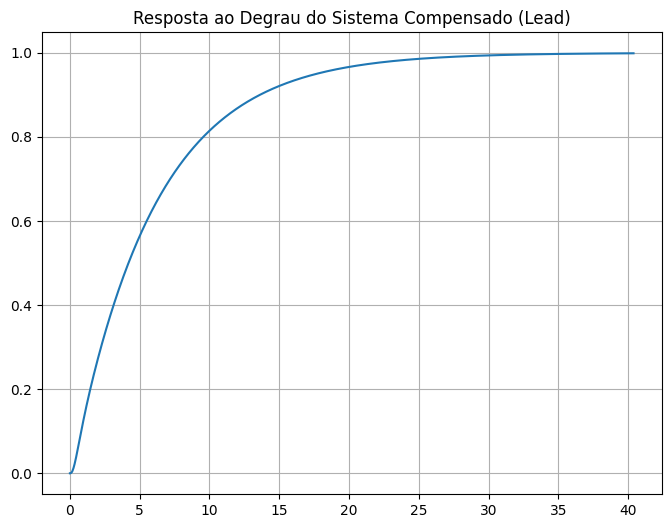

In [19]:
# =============================
# 6️⃣ Resposta ao degrau do sistema compensado
# =============================

K = 10
T_comp = ctrl.feedback(K * G_comp, 1)
t, y = ctrl.step_response(T_comp)

plt.figure(figsize=(8,6))
plt.plot(t, y)
plt.title("Resposta ao Degrau do Sistema Compensado (Lead)")
plt.grid(True)
plt.show()
